In [1]:
#Import Libaries Data Frame
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
import numpy as mp

# unemployment data
unemp_data=pd.read_excel("data/Unemployment.xls", header=7)
# population data
pop_data=pd.read_excel("data/PopulationEstimates.xls", header=2)

In [2]:
#unemp_data.info()
print(pop_data.info(verbose = True))


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3273 entries, 0 to 3272
Data columns (total 149 columns):
FIPS                               int64
State                              object
Area_Name                          object
Rural-urban_Continuum Code_2003    float64
Rural-urban_Continuum Code_2013    float64
Urban_Influence_Code_2003          float64
Urban_Influence_Code_2013          float64
Economic_typology_2015             float64
CENSUS_2010_POP                    int64
ESTIMATES_BASE_2010                int64
POP_ESTIMATE_2010                  int64
POP_ESTIMATE_2011                  int64
POP_ESTIMATE_2012                  int64
POP_ESTIMATE_2013                  int64
POP_ESTIMATE_2014                  int64
POP_ESTIMATE_2015                  int64
POP_ESTIMATE_2016                  int64
POP_ESTIMATE_2017                  int64
POP_ESTIMATE_2018                  int64
N_POP_CHG_2010                     float64
N_POP_CHG_2011                     float64
N_POP_CHG_2012 

## Analysis of Unemployment Rate in 2018

Description of Unemployment Rate:
count    3272.000000
mean        4.296608
std         1.884719
min         1.300000
5%          2.400000
10%         2.600000
25%         3.175000
50%         3.900000
75%         4.900000
90%         6.100000
95%         7.345000
max        19.900000
Name: Unemployment_rate_2018, dtype: float64 


Text(0.5, 1.0, 'Distribution of Unemployment Rate in 2018')


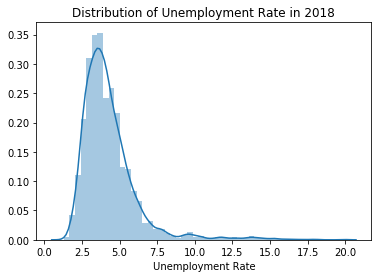

In [3]:
unemploy_rate = unemp_data.Unemployment_rate_2018
# Analysis
print("Description of Unemployment Rate:")
print(unemploy_rate.describe(percentiles=[.05,.1,.25, .5, .75,.9,.95]),"\n\n")

# Visualization
print(sb.distplot(unemploy_rate.dropna(),axlabel="Unemployment Rate").set_title("Distribution of Unemployment Rate in 2018"))

## Population in 2018

Description of Population:
count    3.220000e+03
mean     1.025971e+05
std      3.296352e+05
min      8.800000e+01
5%       2.839800e+03
10%      5.167300e+03
25%      1.113600e+04
50%      2.606350e+04
75%      6.701325e+04
90%      2.075025e+05
95%      4.358621e+05
max      1.010552e+07
Name: POP_ESTIMATE_2018, dtype: float64 




Text(0.5, 1.0, 'Distribution of Population in 2018')

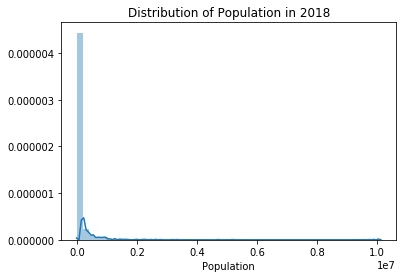

In [4]:
pop2018 = pop_data.POP_ESTIMATE_2018[pop_data.FIPS%1000 != 0]

# Analysis
print("Description of Population:")
print(pop2018.describe(percentiles=[.05,.1,.25, .5, .75,.9,.95]),"\n\n")

# Visualization
sb.distplot(pop2018.dropna(),axlabel="Population").set_title("Distribution of Population in 2018")

## Population Change in 2018

Description of Population Change:
count    3142.000000
mean        0.001844
std         0.011825
min        -0.069561
5%         -0.015329
10%        -0.011469
25%        -0.005200
50%         0.001311
75%         0.008009
90%         0.015658
95%         0.021417
max         0.105263
dtype: float64 




Text(0.5, 1.0, 'Distribution of Population Change in 2018')

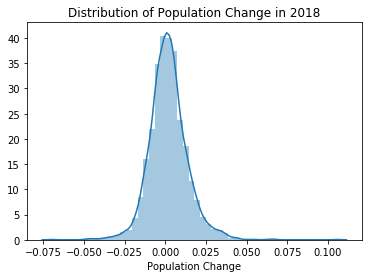

In [5]:
pop_change2018 = pop_data.N_POP_CHG_2018[pop_data.FIPS%1000 != 0]
pop_change2018 = pop_change2018/pop2018
# Analysis
print("Description of Population Change:")
print(pop_change2018.describe(percentiles=[.05,.1,.25, .5, .75,.9,.95]),"\n\n")

# Visualization
sb.distplot(pop_change2018.dropna(),axlabel="Population Change").set_title("Distribution of Population Change in 2018")

ValueError: all the input array dimensions for the concatenation axis must match exactly, but along dimension 1, the array at index 0 has size 3275 and the array at index 1 has size 3220

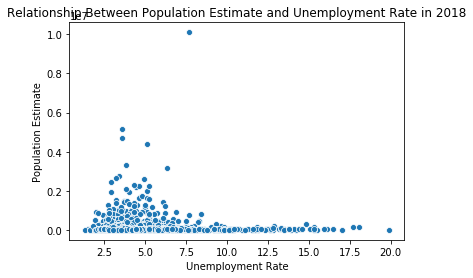

In [6]:
sb.scatterplot(x = unemploy_rate, y = pop2018)
plt.title("Relationship Between Population Estimate and Unemployment Rate in 2018")
plt.xlabel("Unemployment Rate")
plt.ylabel("Population Estimate")

mp.cov(unemploy_rate,pop2018)

In [ ]:
sb.scatterplot(x = unemploy_rate, y = pop_change2018)
plt.title("Relationship Between Population Change and Unemployment Rate in 2018")
plt.xlabel("Unemployment Rate")
plt.ylabel("Population Change")

We can conclude that the unemployment rate increases for smaller countys based upon the population estimate. The population change remains inconclusive as there are many variations for the population change vs unemployment rate.